#  Retail Analysis with Walmart Data

# Data Understanding

This is the historical data that covers sales from 2010-02-05 to 2012-11-01, in the file Walmart_Store_sales. Within this file you will find the following fields:

- Store - the store number

- Date - the week of sales-Weekly_Sales -  sales for the given store

- Holiday_Flag - whether the week is a special holiday week 1 – Holiday week 0 – Non-holiday week

- Temperature - Temperature on the day of sale

- Fuel_Price - Cost of fuel in the region

- CPI – Prevailing consumer price index

- Unemployment - Prevailing unemployment rate

**Holiday Events**

Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13

Labour Day: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13

Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13

Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13


 ## Basic Statistics Tasks To Perform

1. Which store has maximum sales

2. Which store has maximum standard deviation i.e., the sales vary a lot. Also, find out the coefficient of mean to standard deviation

3. Which store/s has good quarterly growth rate in Q3’2012

4. Some holidays have a negative impact on sales. Find out holidays which have higher sales than the mean sales in     non-holiday season for all stores together

5. Provide a monthly and semester view of sales in units and give insights

**Q1**. Which store has maximum sales
   
Solution :

In [100]:
# First Import Necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [101]:
# Read Data from CSV file and store in df Variable
df=pd.read_csv('Walmart_Store_sales.csv')
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


# Data Prepartion

In [102]:
#To Check shape of Data
df.shape

(6435, 8)

In [103]:
# To check is there any null value in data
df.isna().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

**Observation :** There is No Null Values

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


**Observation :** Above datatype show that Date  is Object type we need to change it to Date dtype

In [105]:
# Changing Object Type to Date Type
df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


c:\Users\Khan\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '19-02-2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
c:\Users\Khan\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '26-02-2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
c:\Users\Khan\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '19-03-2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
c:\Users\Khan\AppData\Local\Programs\Python\Python310\lib\site-packages\p

In [106]:
#To Check Basic Statistics
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [107]:
# Splitting Date and create new columns ( Day,Month and Year) as it question number 5
df["Day"]= pd.DatetimeIndex(df['Date']).day
df['Month'] = pd.DatetimeIndex(df['Date']).month
df['Year'] = pd.DatetimeIndex(df['Date']).year
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2,5,2010
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2,12,2010
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,19,2,2010
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,26,2,2010
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,3,5,2010
...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,28,9,2012
6431,45,2012-05-10,733455.07,0,64.89,3.985,192.170412,8.667,10,5,2012
6432,45,2012-12-10,734464.36,0,54.47,4.000,192.327265,8.667,10,12,2012
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,19,10,2012


In [108]:
# To Get All Total Unique  Store Number
Total_Unique=df['Store'].unique()
print("Number of Unique Store are",Total_Unique)

Number of Unique Store are [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45]


**Observation -** We have 45 Store

# Task to Perform

**Q1**. Which store has maximum sales

In [109]:
#To Get Maximum Sales values
df.sort_values(by='Weekly_Sales',ascending=False).groupby('Store')['Weekly_Sales'].sum().round().max()

301397792.0

In [110]:
#To Get Highest Store Name 
highest_Sales=df.groupby('Store')['Weekly_Sales'].sum()
highest_Sales.idxmax()

20

**Observation** :
 - By Looking at above  Calculation we can say that 20 Store has maximum sales 
 - Lets Confirm by Visulation

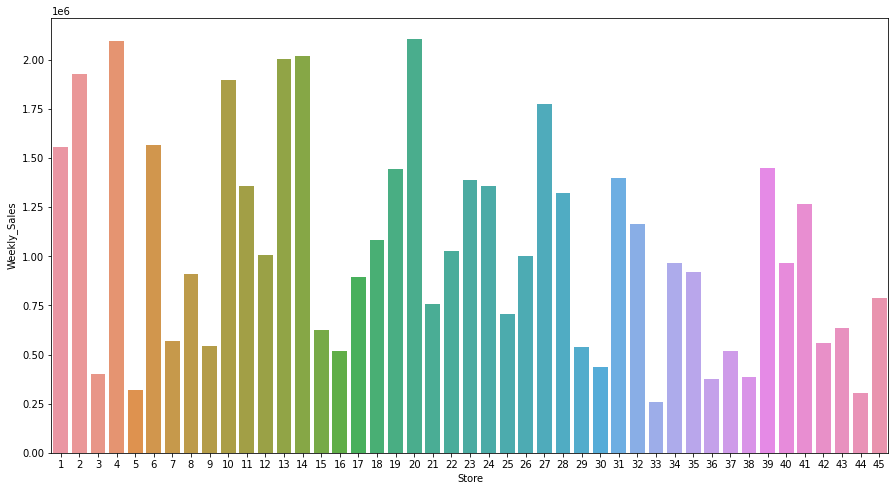

In [111]:
# Plot and Check the 20 Store has maximum sales or Not
plt.figure(figsize = (15,8))
ax = sns.barplot(x="Store", y="Weekly_Sales", ci=None,data=df)

**Observation** :
 - By Looking at Above bar Plot we can justify that 20 Store has maximum sales 

**Q2**. Which store has maximum standard deviation i.e., the sales vary a lot. Also, find out the coefficient of mean to standard deviation

In [112]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151,15.650350,6.475524,2010.965035
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885,8.753908,3.321797,0.797019
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000,1.000000,1.000000,2010.000000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000,8.000000,4.000000,2010.000000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000,16.000000,6.000000,2011.000000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000,23.000000,9.000000,2012.000000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000,31.000000,12.000000,2012.000000


**Formula** :
 Coefficient of Variation (CV) = (Standard Deviation/Mean) × 100

In [113]:
# #To Get Highest Standard Deviation
Highest_Standard_Deviation=df.groupby('Store')['Weekly_Sales'].std()
print("Highest Standard Deviation of Sales Store :",Highest_Standard_Deviation.idxmax())

Highest Standard Deviation of Sales Store : 14


In [114]:
df_store_14 =df.loc[df['Store']==14] # To Select Store 14 in Another DataFrame
df_store_14.describe() # To Get Basic Statitics Stat Like Standard Devivation and Mean in Store 14

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year
count,143.0,1.430000e+02,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,14.0,2.020978e+06,0.069930,57.790979,3.417608,186.285678,8.648748,15.650350,6.475524,2010.965035
std,0.0,3.175699e+05,0.255926,16.271612,0.443029,3.594820,0.151460,8.783995,3.333213,0.799759
min,14.0,1.479515e+06,0.000000,24.050000,2.699000,181.646815,8.424000,1.000000,1.000000,2010.000000
25%,14.0,1.873298e+06,0.000000,45.585000,2.921000,182.619515,8.523000,8.000000,4.000000,2010.000000
50%,14.0,2.004330e+06,0.000000,58.850000,3.541000,185.937438,8.625000,16.000000,6.000000,2011.000000
75%,14.0,2.125780e+06,0.000000,72.585000,3.809000,189.924736,8.724000,23.000000,9.000000,2012.000000
max,14.0,3.818686e+06,1.000000,82.990000,4.066000,192.330854,8.992000,31.000000,12.000000,2012.000000


**Observation :**  We get Standard Deviation = 	3.175699e+05 & Mean =2.020978e+06	  

In [115]:
std_dev=3.175699e+05	# Store in Standard Deviation in std_dev of 14 Store
mean=2.020978e+06	    # Store in Mean in Mean of 14 Store
CV = (std_dev / mean)*100 # Calculating Coefficient of Variation  of 14 Store
print("Coefficient of Variation of Store 14 =",CV)

Coefficient of Variation of Store 14 = 15.71367427057593


**Observation** :
 - By Looking at by Calculation we can justify that 14 Store has Maximum sales and its Coefficient of Variation  is 15.71367427057593

**Q3**. Which store/s has good quarterly growth rate in Q3’2012

In [116]:
# Third Quater Which range from 7 - 10 Month
walmart_data_Q32012 = df[((df['Date']) >= '2012-07-01') & ((df['Date']) <= ('2012-09-01'))]
walmart_data_Q32012 

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year
122,1,2012-08-06,1697230.96,0,78.30,3.452,221.749484,7.143,6,8,2012
127,1,2012-07-13,1527014.04,0,77.12,3.256,221.924158,6.908,13,7,2012
128,1,2012-07-20,1497954.76,0,80.42,3.311,221.932727,6.908,20,7,2012
129,1,2012-07-27,1439123.71,0,82.66,3.407,221.941295,6.908,27,7,2012
132,1,2012-08-17,1597868.05,0,84.85,3.571,222.038411,6.908,17,8,2012
...,...,...,...,...,...,...,...,...,...,...,...
6421,45,2012-07-27,711671.58,0,77.20,3.647,191.165566,8.684,27,7,2012
6424,45,2012-08-17,722496.93,0,75.71,3.807,191.228492,8.684,17,8,2012
6425,45,2012-08-24,718232.26,0,72.62,3.834,191.344887,8.684,24,8,2012
6426,45,2012-08-31,734297.87,0,75.09,3.867,191.461281,8.684,31,8,2012


In [117]:
walmart_data_growth = walmart_data_Q32012.groupby(['Store'])['Weekly_Sales'].sum() #To get data growth  
walmart_data_growth

Store
1     12497164.63
2     15068546.49
3      3309539.61
4     17184755.18
5      2616077.17
6     12602014.74
7      5145719.21
8      7287654.54
9      4379738.32
10    14244984.38
11    10859741.55
12     7975256.52
13    16547587.90
14    13476932.21
15     4749680.33
16     4439284.00
17     7691713.66
18     8487908.30
19    11238000.13
20    16441784.91
21     5705679.85
22     8011276.00
23    11874225.21
24    11036817.80
25     5660441.24
26     8477063.95
27    13966116.82
28     9985386.04
29     4169231.08
30     3428281.56
31    11035442.71
32     9545018.65
33     2116785.52
34     7672976.76
35     7047799.89
36     2393072.59
37     4150660.97
38     3437491.66
39    12930297.16
40     7972353.84
41    11238592.05
42     4551141.89
43     4935069.08
44     2677995.56
45     5935775.03
Name: Weekly_Sales, dtype: float64

In [118]:
print("Store Number", walmart_data_growth.idxmax(),"has Good Quartely Growth in Q3'2012 with Values :",walmart_data_growth.max())

Store Number 4 has Good Quartely Growth in Q3'2012 with Values : 17184755.18


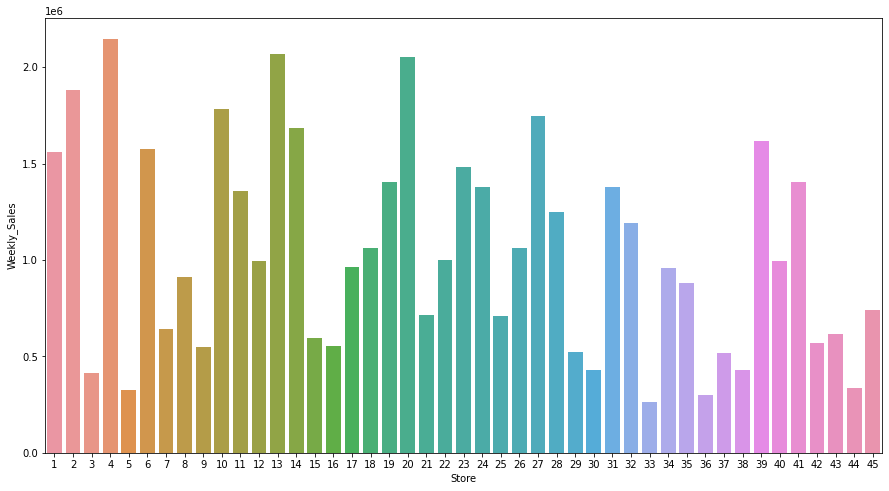

In [119]:
plt.figure(figsize = (15,8))
plotting_Highest_Sales = sns.barplot(x="Store", y="Weekly_Sales", ci=None,data=walmart_data_Q32012)



 **Observation** 
 - By looking at Above Barplot we can say that Store 4  has Good Quartely Growth in Q3'2012
  

**Q4**. Some holidays have a negative impact on sales. Find out holidays which have higher sales than the mean sales in   non-holiday season for all stores together

**Holiday Event :**

Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13 [2010-02-12, 2011-02-11,2012-02-10,2013-02-08]

Labour Day: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13 [2010-09-10,2011-09-09,2012-09-07,2013-09-06]

Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13[2010-11-26,2011-11-25,2013-11-23,2013-11-29]

Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13[2010-12-31, 2011-12-30, 2012-12-28, 2013-12-27]


In [120]:
stores_holiday_sales = df[df['Holiday_Flag'] == 1] # Store of Holiday_Sales
stores_holiday_sales

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2,12,2010
31,1,2010-10-09,1507460.69,1,78.69,2.565,211.495190,7.787,9,10,2010
42,1,2010-11-26,1955624.11,1,64.52,2.735,211.748433,7.838,26,11,2010
47,1,2010-12-31,1367320.01,1,48.43,2.943,211.404932,7.838,31,12,2010
53,1,2011-11-02,1649614.93,1,36.39,3.022,212.936705,7.742,2,11,2011
...,...,...,...,...,...,...,...,...,...,...,...
6375,45,2011-09-09,746129.56,1,71.48,3.738,186.673738,8.625,9,9,2011
6386,45,2011-11-25,1170672.94,1,48.71,3.492,188.350400,8.523,25,11,2011
6391,45,2011-12-30,869403.63,1,37.79,3.389,189.062016,8.523,30,12,2011
6397,45,2012-10-02,803657.12,1,37.00,3.640,189.707605,8.424,2,10,2012


In [121]:
stores_nonholiday_sales = df[df['Holiday_Flag'] == 0] # Store of Non_Holiday_Sales
stores_nonholiday_sales

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2,5,2010
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,19,2,2010
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,26,2,2010
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,3,5,2010
5,1,2010-12-03,1439541.59,0,57.79,2.667,211.380643,8.106,3,12,2010
...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,28,9,2012
6431,45,2012-05-10,733455.07,0,64.89,3.985,192.170412,8.667,10,5,2012
6432,45,2012-12-10,734464.36,0,54.47,4.000,192.327265,8.667,10,12,2012
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,19,10,2012


**Holiday_Event -**

In [122]:
#Stores Sales in Super Bowl Day
#Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13
stores_holiday_sales_superBowl=stores_holiday_sales[((stores_holiday_sales['Date']) == '12-02-2010')|
                                                      ((stores_holiday_sales['Date']) == '11-02-2011')|
                                                      ((stores_holiday_sales['Date']) == '10-02-2012')|
                                                      ((stores_holiday_sales['Date']) == '08-02-2013')]

In [123]:
#Labour Day: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13 

stores_holiday_sales_labourDay=stores_holiday_sales[((stores_holiday_sales['Date']) == '10-09-2010')|
                                                      ((stores_holiday_sales['Date']) == '09-09-2011')|
                                                      ((stores_holiday_sales['Date']) == '07-09-2012')|
                                                      ((stores_holiday_sales['Date']) == '06-09-2013')]

In [125]:
#Stores Sales in Thanks Giving
#Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13
stores_holiday_sales_thanksgiving =stores_holiday_sales[((stores_holiday_sales['Date']) == '26-11-2010')|
                                                       ((stores_holiday_sales['Date']) == '25-11-2011')|
                                                       ((stores_holiday_sales['Date']) == '23-11-2012')|
                                                       ((stores_holiday_sales['Date']) == '29-11-2013')]


In [127]:
#Stores Sales in Christmas
# Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13
stores_holiday_sales_Christmas =stores_holiday_sales[((stores_holiday_sales['Date']) == '31-12-2010')|
                                                      ((stores_holiday_sales['Date']) == '30-12-2011')|
                                                      ((stores_holiday_sales['Date']) == '28-12-2012')|
                                                      ((stores_holiday_sales['Date']) == '27-12-2013')]

In [128]:
print("Super Bowl Day Sale",stores_holiday_sales_superBowl['Weekly_Sales'].mean().round(2))
print("Labour Day Sale",stores_holiday_sales_labourDay['Weekly_Sales'].mean().round(2))
print("Thanksgiving Day Sale",stores_holiday_sales_thanksgiving['Weekly_Sales'].mean().round(2))
print("Christmas Day Sale",stores_holiday_sales_Christmas['Weekly_Sales'].mean().round(2))

Super Bowl Day Sale 1079127.99
Labour Day Sale 1042427.29
Thanksgiving Day Sale 1471273.43
Christmas Day Sale 960833.11


**Observation :** Thanksgiving Day Sale has Highest Mean in Holiday Sale

**Non-Holiday Sales :**

In [129]:
# Mean sales in the non-holiday season for all stores together.
non_holiday_sales = df[(df['Holiday_Flag'] == 0)]['Weekly_Sales'].mean().round(2)
print("Mean sales in the non-holiday season for all stores together :\n",non_holiday_sales)

Mean sales in the non-holiday season for all stores together :
 1041256.38


**Observation**
- We found that Thanksgiving has the highest sales 1,471,273.43 than non-holiday sales 1,041,256.38

**Q5**. Provide a monthly and semester view of sales in units and give insights

In [130]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2,5,2010
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2,12,2010
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,19,2,2010
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,26,2,2010
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,3,5,2010


Text(0.5, 1.0, 'Monthly View Of Sales')

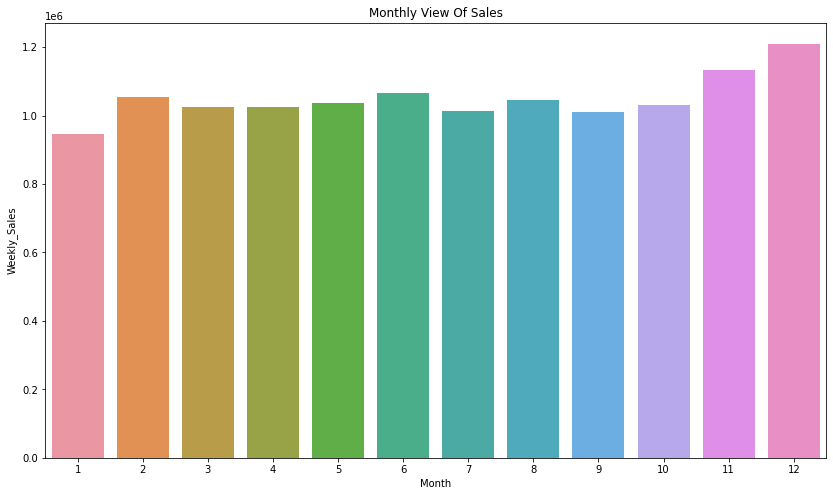

In [131]:
plt.figure(figsize=(14,8))
Month_View = sns.barplot(x="Month", y="Weekly_Sales", data=df,ci=None)
Month_View.set_title('Monthly View Of Sales')

**Observation :** 
  - Above Bar plot Show the  December has Highest Sales

<Figure size 720x432 with 0 Axes>

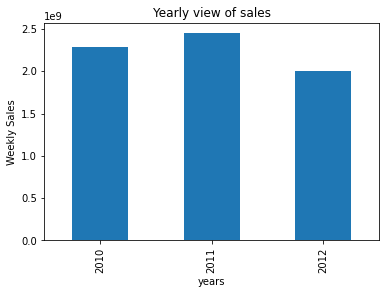

In [132]:
# Yearly view of sales
plt.figure(figsize=(10,6))

df.groupby("Year")[["Weekly_Sales"]].sum().plot(kind='bar',legend=False)
plt.xlabel("years")
plt.ylabel("Weekly Sales")
plt.title("Yearly view of sales");

**Observation-**
I have drawn some insights 
 1. Year 2010 has the highest sales and 2012 has the lowest sales.
 2.  December month has the highest weekly sales.
 3.  Year 2011 has the highest weekly sales




# Statistical Model

For Store 1 – Build  prediction models to forecast demand.Linear Regression – Utilize variables like date and restructure dates as 1 for 5 Feb 2010 (starting from the earliest date in order). Hypothesize if CPI, unemployment, and fuel price have any impact on sales.

Change dates into days by creating new variable.

Select the model which gives best accuracy

- For Store 1 – Build  prediction models to forecast demand. Linear Regression – Utilize variables like date and restructure dates as 1 for 5 Feb 2010 (starting from the earliest date in order). Hypothesize if CPI, unemployment, and fuel price have any impact on sales.


**Before Buliding Model find and remove  outliers**

c:\Users\Khan\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\Khan\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\Khan\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will re

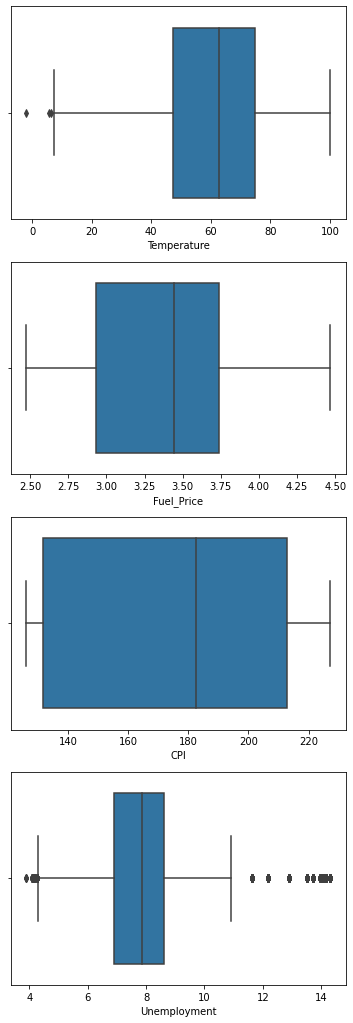

In [133]:
# Before Buliding Model find and remove  outliers 
fig, axs = plt.subplots(4,figsize=(6,18))
X = df[['Temperature','Fuel_Price','CPI','Unemployment']]
for i,column in enumerate(X):
    sns.boxplot(df[column], ax=axs[i])

**Observation :** 
 -  Unemployment and Temperature has Outlier

In [134]:
# drop the outliers     
data_new = df[(df['Unemployment']<10) & (df['Unemployment']>4.5) & (df['Temperature']>10)]
data_new

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2,5,2010
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2,12,2010
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,19,2,2010
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,26,2,2010
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,3,5,2010
...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,28,9,2012
6431,45,2012-05-10,733455.07,0,64.89,3.985,192.170412,8.667,10,5,2012
6432,45,2012-12-10,734464.36,0,54.47,4.000,192.327265,8.667,10,12,2012
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,19,10,2012


c:\Users\Khan\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\Khan\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\Khan\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will re

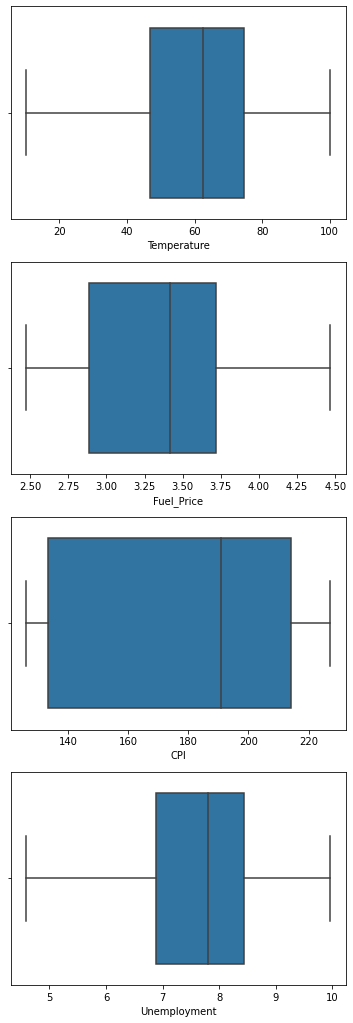

In [135]:
# Before Buliding Model find and remove  outliers 
fig, axs = plt.subplots(4,figsize=(6,18))
X = data_new[['Temperature','Fuel_Price','CPI','Unemployment']]
for i,column in enumerate(X):
    sns.boxplot(data_new[column], ax=axs[i])

In [136]:
# Import sklearn 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression

In [137]:
df_Store_1=data_new.loc[data_new['Store'] == 1]

In [138]:
df_Store_1.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2,5,2010
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2,12,2010
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,19,2,2010
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,26,2,2010
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,3,5,2010


- Checking attribue of CPI, unemployment, and fuel price have any impact on sales.

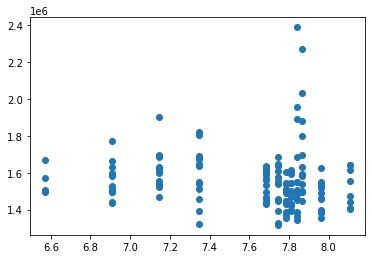

-0.09795539472957951


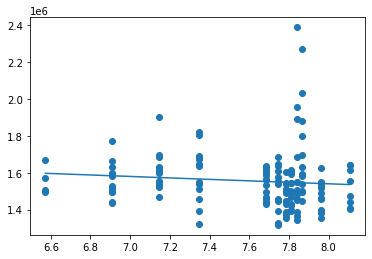

In [139]:
# Checking attribue of Unemployment vs  Weekly_Sales
x = df_Store_1['Unemployment'] 
y = df_Store_1['Weekly_Sales']

plt.scatter(x, y)
plt.show()
slope, intercept, r, p, std_err = stats.linregress(x, y)
print(r)# r should be between -1 to 1
def myfunc(x):
  return slope * x + intercept
mymodel = list(map(myfunc, x))
plt.scatter(x, y)

plt.plot(x, mymodel)
plt.show()

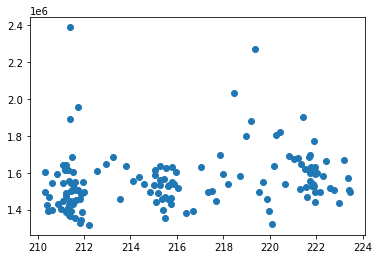

0.22540765942904448


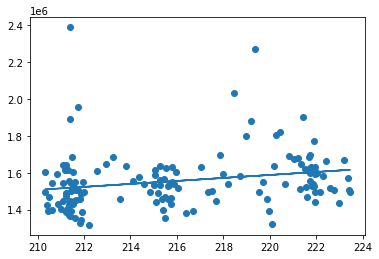

In [140]:
# Checking attribue of CPI vs  Weekly_Sales
x = df_Store_1['CPI'] 
y = df_Store_1['Weekly_Sales']

plt.scatter(x, y)
plt.show()
slope, intercept, r, p, std_err = stats.linregress(x, y)
print(r)# r should be between -1 to 1
def myfunc(x):
  return slope * x + intercept
mymodel = list(map(myfunc, x))
plt.scatter(x, y)

plt.plot(x, mymodel)
plt.show()

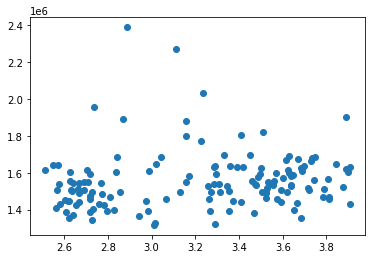

0.12459158039045634


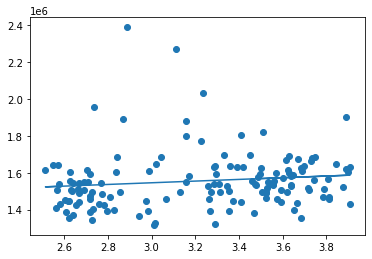

In [141]:
# Checking attribue of Fuel_Price vs  Weekly_Sales
x = df_Store_1['Fuel_Price'] 
y = df_Store_1['Weekly_Sales']

plt.scatter(x, y)
plt.show()
slope, intercept, r, p, std_err = stats.linregress(x, y)
print(r)# r should be between -1 to 1
def myfunc(x):
  return slope * x + intercept
mymodel = list(map(myfunc, x))
plt.scatter(x, y)

plt.plot(x, mymodel)
plt.show()

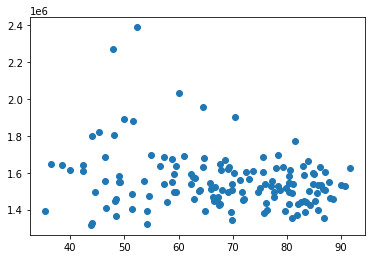

-0.22270055855381085


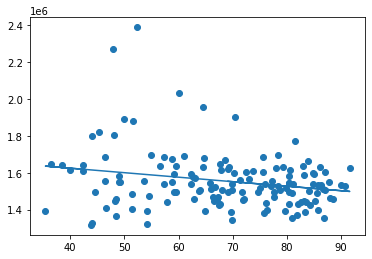

In [142]:
# Checking attribue of Temperature vs  Weekly_Sales
x = df_Store_1['Temperature'] 
y = df_Store_1['Weekly_Sales']

plt.scatter(x, y)
plt.show()
slope, intercept, r, p, std_err = stats.linregress(x, y)
print(r)# r should be between -1 to 1
def myfunc(x):
  return slope * x + intercept
mymodel = list(map(myfunc, x))
plt.scatter(x, y)

plt.plot(x, mymodel)
plt.show()


 Q.  Change dates into days by creating new variable.


Ans : We Have already change in Data Prepartion Process 

In [152]:
# Just For Checking 
data_new.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2,5,2010
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2,12,2010
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,19,2,2010
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,26,2,2010
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,3,5,2010


In [144]:
# Select features and target 
X = data_new[['Store','Fuel_Price','CPI','Unemployment','Day','Month','Year']]
y = data_new['Weekly_Sales']

# Split data to train and test (0.80:0.20)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)


 -  Select the model which gives best accuracy

Linear Regression:

Accuracy: 12.761729435775104
Mean Absolute Error: 432498.35548810835
Mean Squared Error: 267331327674.73254
Root Mean Squared Error: 517040.93423512665


c:\Users\Khan\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


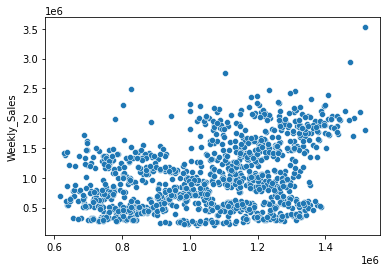

In [145]:
# Linear Regression model
print('Linear Regression:')
print()
reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
print('Accuracy:',reg.score(X_train, y_train)*100)


print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


sns.scatterplot(y_pred, y_test);


 - We Have See Less Accuracy in Linear Regression

Random Forest Regressor:

Accuracy: 94.57900803858068
Mean Absolute Error: 64719.30101035509
Mean Squared Error: 16571416237.849388
Root Mean Squared Error: 128730.01296453516


c:\Users\Khan\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


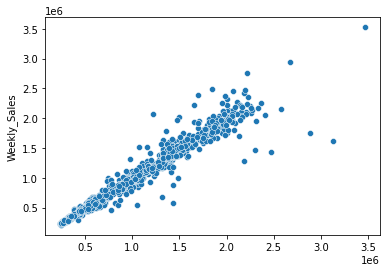

In [146]:
# Random Forest Regressor
print('Random Forest Regressor:')
print()
rfr = RandomForestRegressor(n_estimators = 400,max_depth=15,n_jobs=5)        
rfr.fit(X_train,y_train)
y_pred=rfr.predict(X_test)
print('Accuracy:',rfr.score(X_test, y_test)*100)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


sns.scatterplot(y_pred, y_test);

- We Have See Great Accuracy in Random Forest Regressor with Accuracy: 94.57900803858068
 

**Observation :**
 - We select Random Forest Regressor as it has better Accuracy than Linear Regression 